In [1]:
#Load Tidyverse into R!

library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Bike-Sharing (Given Scenario)
### Bike-sharing is a growing, eco-friendly transportation option that promotes health and helps reduce climate impact. Unlike buses or subways, bike-share systems record detailed trip data, including start/end locations and duration, enabling rich analysis of city mobility patterns.
### Today, we’ll explore data from Capital Bikeshare in Washington, DC. Our goal is to examine whether temperature affects bike rentals during Spring (March 20–June 21). 

In [10]:
# Since we already have tidyverse loaded and ready to use, the first step is to read our new data using read_csv.
# Make sure to assign your answer as bike_data

bike_data <- read_csv("bike_data.csv")
head(bike_data)

Rows: 731 Columns: 16
-- Column specification --------------------------------------------------------
Delimiter: ","
chr   (1): season
dbl  (14): instant, yr, mnth, holiday, weekday, workingday, weathersit, temp...
date  (1): dteday

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,spring,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [11]:
#Mutate the data such that you have a new column called total_users.
#This column would be the sum of the casual_users and the registered_users.
#Assign your answer to an object called bike_mutate.

bike_mutate <- mutate(bike_data, total_users = casual + registered)
head(bike_mutate)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_users
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985,985
2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801,801
3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349,1349
4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562,1562
5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600,1600
6,2011-01-06,spring,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,1606


In [14]:
# Filter out the data to include information about rentals that were only made during Spring
# Name your answer bike_filter

bike_filter <- filter(bike_mutate, season == "spring")
head(bike_filter)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_users
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985,985
2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801,801
3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349,1349
4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562,1562
5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600,1600
6,2011-01-06,spring,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,1606


In [17]:
# Select the columns from the data that we wish to plot. 
# Name your answer bike_select.

bike_select <- select(bike_filter, temp, total_users)
head(bike_select)

temp,total_users
<dbl>,<dbl>
0.344167,985
0.363478,801
0.196364,1349
0.200000,1562
0.226957,1600
0.204348,1606


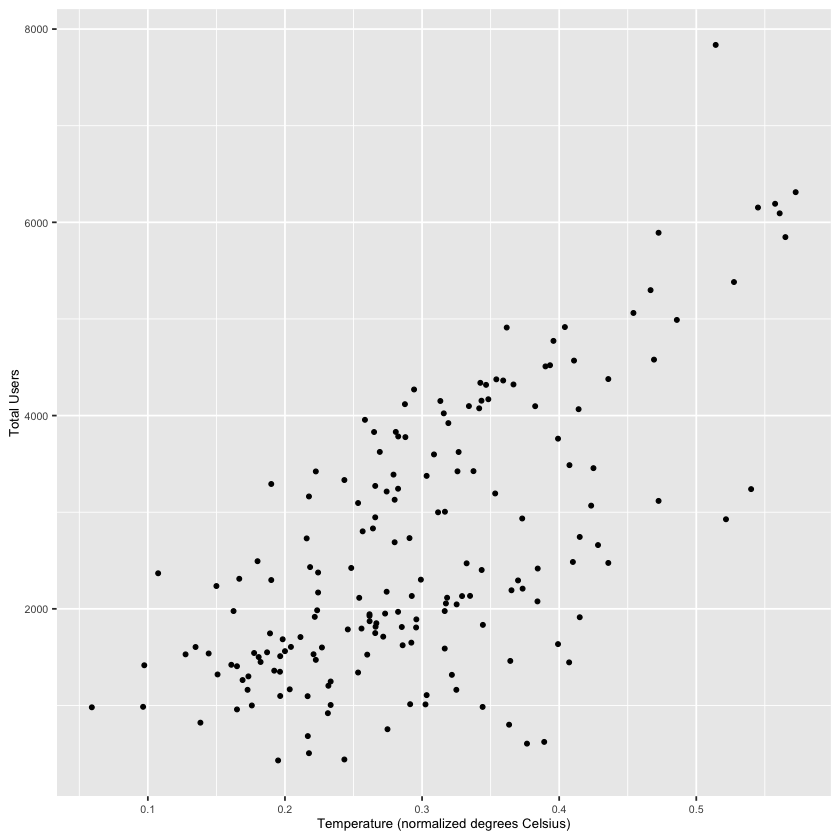

In [21]:
# Now plot the data as a scatter plot.
# Assign your plot to an object called bike_plot_spring

bike_plot_spring <- ggplot(bike_select, aes(x = temp, y = total_users)) + 
        geom_point(size = 1) + # scatter plot
        xlab("Temperature (normalized degrees Celsius)") +  # x-axis name
        ylab("Total Users") + # y-axis name
        theme(text = element_text(size = 8)) # size of text

bike_plot_spring

### In 1-2 sentences, describe whether there is a relationship between the variables observed in the scatterplot of the data for the spring season. 
### Comment on the direction and the strength of the relationship (if there is one), and how the variables change with respect to each other (if they do).

## Solution
### As the temperature increases, so does the number of total users for the Capital bike share system. Thus we see a postive relationship between these two variables. There is quite a bit of scatter, and so the relationship is weak.